Diamonds Dataset을 이용한 가격 예측 모델 구현

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

data = pd.read_csv('diamonds.csv')
df = pd.DataFrame(data)

# IQR 계산
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1

# 하한, 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거 (하한보다 크고 상한보다 작은 값으로 다시 DataFrame 생성)
filtered_df = df[(df['carat'] >= lower_bound) & (df['carat'] <= upper_bound)]

# 결측값 확인
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [12]:
print(df)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [13]:
# 범주형 인코딩 ("cut","color","clarity")
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용할 열 목록 
cols = ["cut","color","clarity"]

# 각 열에 LabelEncoder 적용
encoder = LabelEncoder()
for col in cols:
    df[col] = encoder.fit_transform(df[col])

print(df)


       Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
0               1   0.23    2      1        3   61.5   55.0    326  3.95   
1               2   0.21    3      1        2   59.8   61.0    326  3.89   
2               3   0.23    1      1        4   56.9   65.0    327  4.05   
3               4   0.29    3      5        5   62.4   58.0    334  4.20   
4               5   0.31    1      6        3   63.3   58.0    335  4.34   
...           ...    ...  ...    ...      ...    ...    ...    ...   ...   
53935       53936   0.72    2      0        2   60.8   57.0   2757  5.75   
53936       53937   0.72    1      0        2   63.1   55.0   2757  5.69   
53937       53938   0.70    4      0        2   62.8   60.0   2757  5.66   
53938       53939   0.86    3      4        3   61.0   58.0   2757  6.15   
53939       53940   0.75    2      0        3   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      

In [14]:
# 수치형 변수 스케일링
from sklearn.preprocessing import StandardScaler

num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [15]:
print(df)

       Unnamed: 0     carat  cut  color  clarity     depth     table  price  \
0               1 -1.198168    2      1        3 -0.174092 -1.099672    326   
1               2 -1.240361    3      1        2 -1.360738  1.585529    326   
2               3 -1.198168    1      1        4 -3.385019  3.375663    327   
3               4 -1.071587    3      5        5  0.454133  0.242928    334   
4               5 -1.029394    1      6        3  1.082358  0.242928    335   
...           ...       ...  ...    ...      ...       ...       ...    ...   
53935       53936 -0.164427    2      0        2 -0.662711 -0.204605   2757   
53936       53937 -0.164427    1      0        2  0.942753 -1.099672   2757   
53937       53938 -0.206621    4      0        2  0.733344  1.137995   2757   
53938       53939  0.130927    3      4        3 -0.523105  0.242928   2757   
53939       53940 -0.101137    2      0        3  0.314528 -1.099672   2757   

              x         y         z  
0     -1.5878

In [16]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# 데이터 분할
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 랜덤 포레스트

In [51]:
# 랜덤 포레스트 모델 학습
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
# 예측 및 평가
y_pred1 = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")

MSE: 451.82
R2 Score: 1.0000


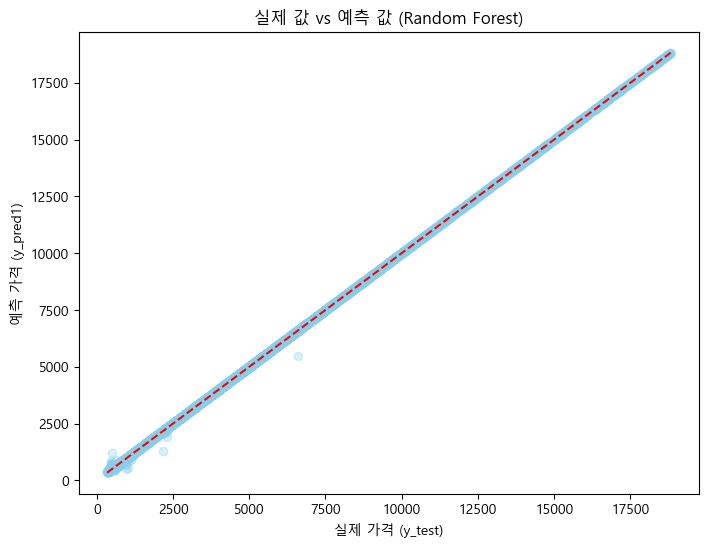

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred1, alpha=0.3, color='skyblue')
plt.xlabel("실제 가격 (y_test)")
plt.ylabel("예측 가격 (y_pred1)")
plt.title("실제 값 vs 예측 값 (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선(완벽 예측선)
plt.show()

##### 결정 트리

In [54]:
# 결정 트리 모델 학습
model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
# 예측 및 평가
y_pred2 = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")

MSE: 760751.35
R2 Score: 0.9521


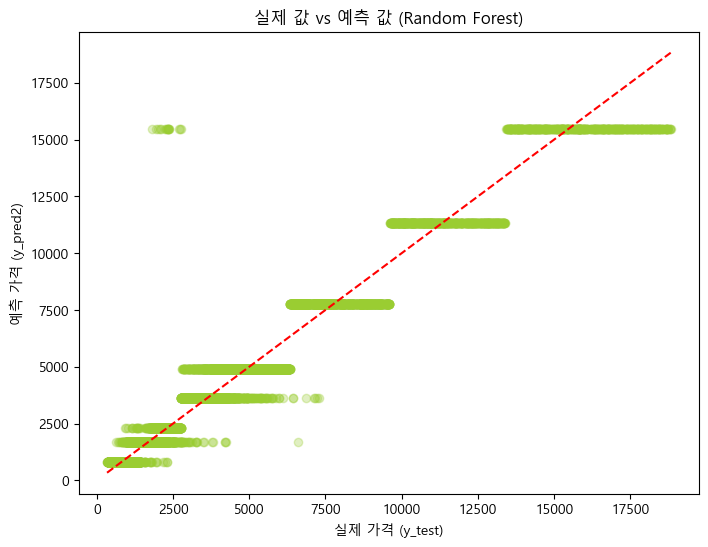

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, alpha=0.3, color='yellowgreen')
plt.xlabel("실제 가격 (y_test)")
plt.ylabel("예측 가격 (y_pred2)")
plt.title("실제 값 vs 예측 값 (Decision Tree)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선(완벽 예측선)
plt.show()